In [ ]:
# Fredkin

In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx
import tensorflow as tf
from pennylane.templates.layers import StronglyEntanglingLayers

In [2]:
# matrix representation of fredkin gate
U = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1]])


#@qml.qnode(dev)
#def U_actual():
#    qml.QubitUnitary(U,wires=[0,1,2])
#    return qml.state()
q=qml.QubitUnitary(U,wires=[0,1,2])
print(U)


[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]]


In [3]:
dev = qml.device("default.qubit.autograd", wires=3)


#@qml.qnode(dev)
def ansatz(params):
    l=params
    #H=Z⊗Z⊗I
    qml.CNOT(wires=[0,1])
    qml.RZ(l[0],wires=1)
    qml.CNOT(wires=[0,1])

    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[1,2])
    
    
    # circuit for local ham H=Z⊗I⊗Z
    qml.CNOT(wires=[0,2])
    qml.RZ(l[2],wires=2)
    qml.CNOT(wires=[0,2])
    
    #qml.Identity(wires=0)*l[11]
   
    # single qubit gates
    
    # circuit for local ham H=I⊗I⊗Z+I⊗I⊗X+I⊗I⊗Y
    
    
    # circuit for local ham H=I⊗Z⊗I+I⊗X⊗I+I⊗Y⊗I
    #qml.Identity(wires=0) 
    #qml.RZ(l[3],wires=1)
   
    # circuit for local ham H=Z⊗I⊗I+X⊗I⊗I+Y⊗I⊗I
    qml.RZ(l[3],wires=0)
    '''
    #H=I⊗Z⊗ X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=2)
    
    
    # circuit for local ham H=Z⊗I⊗X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[6],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=2)
    '''
    
    # important: more 2 qubit interations to be added....   

   
    

    # circuit for local ham H=X⊗X⊗I  
    #[qml.Hadamard(wires=i) for i in range(0,2)]
    [qml.Hadamard(wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[4],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.Hadamard(wires=i) for i in range(0,2)]
    
    # circuit for local ham H=X⊗I⊗X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[5],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=I⊗X⊗X
    [qml.Hadamard(wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[6],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.Hadamard(wires=i) for i in range(1,3)]
    
    #[qml.Hadamard(wires=i) for i in range(1,3)]
 


    # circuit for local ham H=I⊗Y⊗Y
    [qml.RX(np.pi/2,wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[7],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.RX(-np.pi/2,wires=i) for i in range(1,3)]




    qml.RX(l[8],wires=2)
    
   
 
    qml.RX(l[9],wires=1)
    
    #qml.RY(l[14],wires=0)
   
    '''
    #H=X⊗Z⊗ I
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RZ(l[18],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    
    #H=I⊗X⊗ Z
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[19],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=1)
    
      #H=I⊗X⊗ y
    qml.Hadamard(wires=1)
    qml.RX(np.pi/2,wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(2*l[20],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=1)
    qml.RX(-np.pi/2,wires=2)
    
    #H=X⊗ y⊗I
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2,wires=1)
    qml.CNOT(wires=[0,1])
    qml.RZ(2*l[21],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    qml.RX(-np.pi/2,wires=1)
  
    '''

In [23]:
params_opt =[ 7.05959130e-03,  1.05041442e+00,  7.04528134e-03,
         1.31017884e+00,  1.02164535e+00,  1.02160283e+00,
         4.08733183e-01, -7.80485442e-01,  4.13271795e-04,
        -4.13272519e-04]# optimized params

In [154]:
cost3(params)

0.14853241889739

In [5]:
# ZGR ansatz
def ansatz2(l):
    qml.RY(l[0],wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(l[1],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(l[2],wires=1)
    qml.CNOT(wires=[0,2])
    qml.RY(l[3],wires=2)
    qml.CNOT(wires=[1,2])
    qml.RY(l[4],wires=2)
    qml.CNOT(wires=[0,2])
    qml.RY(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.RY(l[6],wires=2)

In [6]:
def ansatz3(l):
    [qml.RY(l[i],wires=i) for i in range(3)]
    qml.CNOT(wires=[2,0])
    [qml.CNOT(wires=[0,i]) for i in range(1,3)]
    [qml.RY(l[i+3],wires=i) for i in range(3)]
    qml.CNOT(wires=[0,2])
    [qml.CNOT(wires=[i,0]) for i in range(1,3)]
    

In [7]:
def ansatz4(l):
    StronglyEntanglingLayers(l,wires=[0,1,2])

In [8]:
@qml.qnode(dev, diff_method="backprop")

def circuit(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
  
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])

    #ansatz2(params[:7])
    #ansatz3(params[:6])
    #ansatz4(params)
    
    #if apply_inv:
    #    qml.QubitUnitary(U,wires=[0,1,2]).inv()
    return qml.state()

@qml.qnode(dev, diff_method="backprop")
def target_st(state):
    qml.BasisState(np.array(state), wires=[0,1,2])
    qml.QubitUnitary(U,wires=[0,1,2]).inv() # fredkin gate
    return qml.state()

In [10]:
circ_ket=[]
for i in range(8):
    state=state_vector[i]
    circ_ket.append(circuit(params,state))
    
print(np.abs(circ_ket))


act_ket=[]
for i in range(8):
    state=state_vector[i]
    act_ket.append(target_st(state))
    
#print(act_ket)

[[0.37817888 0.36442491 0.31292092 0.37646613 0.25816382 0.20867591
  0.15176429 0.59270767]
 [0.32424926 0.60518484 0.23820783 0.19270795 0.05365659 0.41684906
  0.41268566 0.2962816 ]
 [0.29246336 0.21428304 0.51475082 0.28165178 0.20019982 0.56337216
  0.37376683 0.16456618]
 [0.38488806 0.15000809 0.13224116 0.3647689  0.48881159 0.08971964
  0.41352006 0.51071465]
 [0.23633695 0.11327869 0.10573721 0.43691449 0.74328645 0.28672404
  0.28352583 0.11902036]
 [0.25846392 0.4578901  0.58565707 0.17457614 0.12034559 0.14464846
  0.52117604 0.20743991]
 [0.17101646 0.36759661 0.37699132 0.41626386 0.27409522 0.55279394
  0.25756624 0.27051497]
 [0.60519761 0.27368499 0.25803948 0.46271602 0.0967971  0.22031441
  0.27857841 0.37766101]]


In [36]:
b=[]
for i in range(5,7):
    b.append(tf.math.real(np.sum(np.dot(act_ket[i],tf.math.conj(circ_ket[i])))))
print(b[0])
#print(np.real(a)-1)

tf.Tensor(-0.18708212505007982, shape=(), dtype=float64)


In [ ]:
###########################################################################

In [14]:
def cost3(params):
    circ_ket=[]
    act_ket=[]
    overlaps=[] 
    
    for i in range(8):
        state=state_vector[i]
        circ_ket.append(circuit(params,state))
        act_ket.append(target_st(state))

        overlaps.append((np.sum(np.dot(np.conj(circ_ket[i]),act_ket[i]))))
    #mean_overlap = tf.reduce_mean(overlaps)
    
    #cost = tf.abs(tf.reduce_sum(overlaps ))
    cost=0
    for i in range(8):
        cost+=(np.abs(overlaps[i]))**2
    cost_abs=1-(cost)/len(overlaps)   
    return cost_abs#, overlaps

'''
The ultimate cost function

'''

'\nThe ultimate cost function\n\n'

In [ ]:
#############################################################################################

In [15]:
cost3(params)

0.2500008191431895

In [53]:
(target_st([1,0,1]).T).shape

(8,)

In [16]:
#shape = StronglyEntanglingLayers.shape(n_layers=5, n_wires=3)
#params=np.random.random(size=shape)
# specially for strongly entangles layered ansatz

params = np.random.random(10)
Id = np.eye(8, requires_grad=False)
state_vector=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
print(Id[7])
print(state_vector[7])

[0. 0. 0. 0. 0. 0. 0. 1.]
[1 1 1]


In [ ]:
params_known=[3*np.pi/8,np.pi/2,np.pi/8*np.sqrt(143/5),np.pi/8*np.sqrt(143/5),np.pi/8*5*np.sqrt(3),np.pi/8*5*np.sqrt(3),
              -3*np.pi/8,-3*np.pi/8,-3*np.pi/8,3*np.pi/4*np.sqrt(7/5),3*np.pi/4*np.sqrt(7/5)]
len(params_known)

In [125]:
abs(circuit(params,[1,0,1]))

tensor([1.08213158e-03, 9.02607221e-06, 1.56731386e-05, 1.63977005e-03,
        1.11368644e-03, 4.39448612e-01, 8.98264207e-01, 1.11022090e-03], requires_grad=True)

In [93]:
def cost_state(params, i):
    state=state_vector[i]
    return np.sum(np.square(circuit(params, state) - target_st(state)))

def cost(params):
    return  sum(abs(cost_state(params, i))**2 for i in range(8))/len(state_vector) #+sum(cost_state(params, i) for i in range(0,2))#+sum(cost_state(params, i) for i in range(2,6))

In [69]:
def cost1(params):
    return cost_state(params, 1)+cost_state(params, 6)+cost_state(params, 7)

In [17]:
opt = qml.AdagradOptimizer(stepsize=0.2)
cost_arr=[]
params_arr=[]
for i in range(500+1):
    params = opt.step(cost3, params)

    if i % 50 == 0:
        print(f"Cost at step {i}:", cost3(params))
        cost_arr.append(cost3(params))
        params_arr.append(params)

Cost at step 0: 0.6630419329749313
Cost at step 50: 0.001688861723442292
Cost at step 100: 0.00018340523455129265
Cost at step 150: 2.1305621231593186e-05
Cost at step 200: 2.492017175614869e-06
Cost at step 250: 2.917092379872699e-07
Cost at step 300: 3.414989924177547e-08
Cost at step 350: 3.997921660392478e-09
Cost at step 400: 4.680438259185848e-10
Cost at step 450: 5.48030509861519e-11
Cost at step 500: 6.425748821925481e-12


In [73]:
params# from the above optimization- currently the best one

tensor([ 5.78678604e-001,  3.92696871e-001,  5.78678604e-001,
         1.17809725e+000,  5.94502723e-001,  5.94502723e-001,
         3.92694124e-001,  3.92705752e-001, -1.26610241e-132,
        -1.93236093e-143], requires_grad=True)

In [42]:
abs(circuit(params, state_vector[0]))

tensor([1.00000000e+000, 6.33051205e-133, 8.22722217e-139,
        1.29960567e-006, 1.35312031e-138, 2.13745791e-006,
        2.13745793e-006, 1.35312032e-138], requires_grad=True)

In [102]:
opt = qml.AdamOptimizer(stepsize=0.2)

for i in range(1000+1):
    params = opt.step(cost3, params)

    if i % 100 == 0:
        print(f"Cost at step {i}:", cost3(params))

Cost at step 0: 0.5639535868405097
Cost at step 100: 0.1464681470024325
Cost at step 200: 0.1464466108411916
Cost at step 300: 0.14970509109191665
Cost at step 400: 0.14698233892814894
Cost at step 500: 0.16252196660860485
Cost at step 600: 0.147341020242019
Cost at step 700: 0.15113136173632524
Cost at step 800: 0.14704034328356386
Cost at step 900: 0.1475283467948525
Cost at step 1000: 0.14853241889739


In [140]:
'''
The cost3(params) is the ultimate cost function, Don't use "tf" otherwise GradientDescent related optimizers(Adam,...) 
won't work instead apply numpy every where so that any kind of optimizer can be used for optimization
'''

'\nThe cost3(params) is the ultimate cost function, Don\'t use "tf" otherwise GradientDescent related optimizers(Adam,...) \nwon\'t work instead apply numpy every where so that any kind of optimizer can be used for optimization\n'

In [95]:
cost_state(params,0)

tensor(-0.00056888-3.04558463e-05j, requires_grad=True)

In [56]:
abs(circuit(params_arr[6], state_vector[0]))

tensor([0.14654124, 0.14648692, 0.40860815, 0.09707663, 0.39904542,
        0.38803021, 0.1652781 , 0.66600392], requires_grad=True)

In [178]:
opt = qml.optimize.RotosolveOptimizer()
# for ZGR == ansatz2

for i in range(40+1):
#for i in range(300+1):
    params = opt.step(cost3, params)

    if i % 10 == 0:
        print(f"Cost at step {i}:", cost3(params))

Cost at step 0: tf.Tensor(0.7950199767668706, shape=(), dtype=float64)
Cost at step 10: tf.Tensor(0.27411202836429577, shape=(), dtype=float64)
Cost at step 20: tf.Tensor(0.24797244526909235, shape=(), dtype=float64)
Cost at step 30: tf.Tensor(0.24080046238815112, shape=(), dtype=float64)
Cost at step 40: tf.Tensor(0.23799404807299399, shape=(), dtype=float64)


In [19]:
def get_unitary(params):
    return np.array([circuit(params, state, apply_inv=False) for state in state_vector]).T

In [27]:
print("\nOptimized unitary using Hamiltonian:\n", abs(get_unitary(params)))
print("\nThe corresponding optimized parameters:\n",params)
print("\nOptimized unitary size:\n", get_unitary(params).shape)
print("\nActual Toffoli:\n", U)


Optimized unitary using Hamiltonian:
 [[1.00000000e+000 6.33051205e-133 1.74891956e-140 1.29960567e-006
  1.35309230e-138 2.13745793e-006 2.13745791e-006 6.33352191e-139]
 [6.33051205e-133 1.00000000e+000 2.76268235e-008 8.22711649e-139
  2.13741367e-006 1.35312032e-138 1.35312031e-138 1.00047545e-006]
 [8.22722217e-139 2.76268234e-008 1.00000000e+000 6.33051205e-133
  2.13741369e-006 6.33373132e-139 6.33373104e-139 1.00047557e-006]
 [1.29960567e-006 1.74891956e-140 6.33051205e-133 1.00000000e+000
  1.35309231e-138 1.00050853e-006 1.00050849e-006 6.33352266e-139]
 [1.35312031e-138 2.13741367e-006 2.13741369e-006 6.33373104e-139
  1.00000000e+000 1.74580573e-140 6.33051205e-133 1.29970986e-006]
 [2.13745791e-006 1.35309230e-138 1.35309231e-138 1.00050849e-006
  6.33051205e-133 2.75776360e-008 1.00000000e+000 8.22788179e-139]
 [2.13745793e-006 6.33352191e-139 6.33352266e-139 1.00050853e-006
  8.22777611e-139 1.00000000e+000 2.75776361e-008 6.33051205e-133]
 [1.35312032e-138 1.00047545e-

In [101]:
cost_arr # this aaray is used in the below plot

[0.6630419329749313,
 0.001688861723442292,
 0.00018340523455129265,
 2.1305621231593186e-05,
 2.492017175614869e-06,
 2.917092379872699e-07,
 3.414989924177547e-08,
 3.997921660392478e-09,
 4.680438259185848e-10,
 5.48030509861519e-11,
 6.425748821925481e-12]

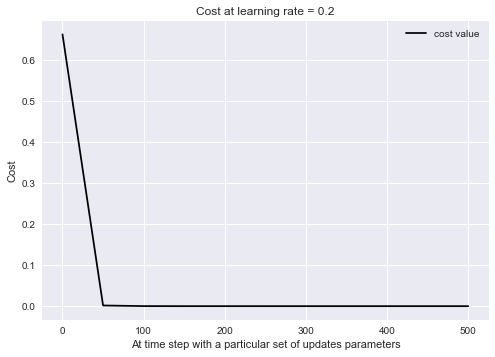

In [143]:
x=np.linspace(0,500,11)
y=cost_arr
plt.plot(x,y,"black",label="cost value")
plt.title("Cost at learning rate = 0.2")
plt.ylabel("Cost")
plt.xlabel("At time step with a particular set of updates parameters")
plt.legend()
plt.show()

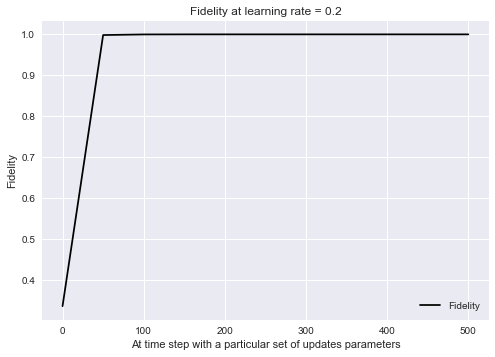

In [144]:
fidelity=[]
for elements in cost_arr:
    fidelity.append(1-elements)
    
fidelity
x=np.linspace(0,500,11)
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.title("Fidelity at learning rate = 0.2")
plt.ylabel("Fidelity")
plt.xlabel("At time step with a particular set of updates parameters")
plt.legend()
plt.show()

In [90]:
params_arr # this array is used in the below plot where each plot represents evolution of each parameter from the below araays

[tensor([ 0.43336544,  0.53094556,  0.40424533,  1.05022968,  0.40382504,
          0.49541695, -0.15671593,  0.44101042,  0.33354385, -0.09831016], requires_grad=True),
 tensor([5.68711513e-01, 3.57712401e-01, 5.68665066e-01, 1.17817992e+00,
         5.91578179e-01, 5.91565884e-01, 3.13443686e-01, 4.98928569e-01,
         4.85973320e-06, 7.30903591e-06], requires_grad=True),
 tensor([5.77543801e-01, 3.80910458e-01, 5.77539781e-01, 1.17809670e+00,
         5.94178161e-01, 5.94174630e-01, 3.66230639e-01, 4.28296151e-01,
         1.05075174e-08, 2.13118251e-08], requires_grad=True),
 tensor([5.78546130e-01, 3.88671517e-01, 5.78545661e-01, 1.17809703e+00,
         5.94464911e-01, 5.94464484e-01, 3.83665504e-01, 4.04852813e-01,
         5.69292136e-11, 1.41468437e-10], requires_grad=True),
 tensor([5.78663101e-01, 3.91321265e-01, 5.78663046e-01, 1.17809722e+00,
         5.94498299e-01, 5.94498248e-01, 3.89609099e-01, 3.96856513e-01,
         4.97481096e-13, 1.35901733e-12], requires_grad=T

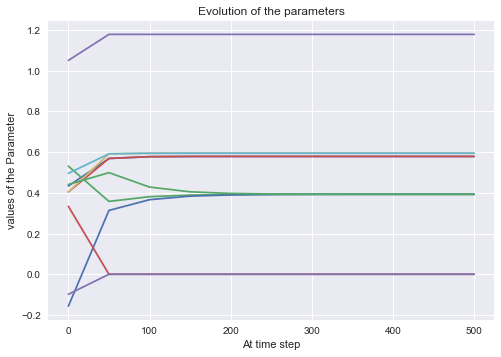

In [130]:
x=np.linspace(0,500,11)
y=params_arr
plt.plot(x,y)
plt.ylabel("values of the Parameter")
plt.xlabel("At time step")
plt.title("Evolution of the parameters")
plt.legend()
plt.show()

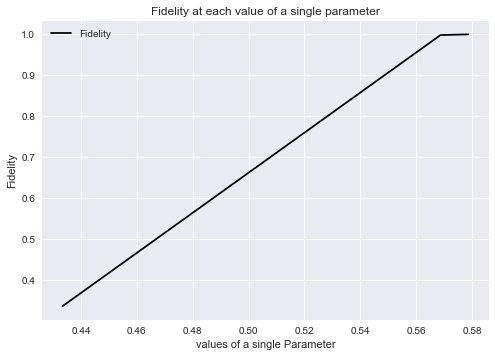

In [132]:
single_param=[]
for i in range(11):
    single_param.append(params_arr[i][0])
x=single_param
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.xlabel("values of a single Parameter")
plt.ylabel("Fidelity")
plt.title("Fidelity at each value of a single parameter")
plt.legend()
plt.show()

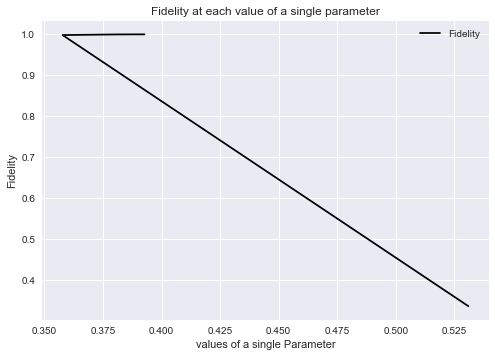

In [133]:
single_param=[]
for i in range(11):
    single_param.append(params_arr[i][1])
x=single_param
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.xlabel("values of a single Parameter")
plt.ylabel("Fidelity")
plt.title("Fidelity at each value of a single parameter")
plt.legend()
plt.show()

In [128]:
print("\nOptimized unitary using Strongly entangled layer with depth=5:\n", abs(get_unitary(params)))
print("\nOptimized unitary size:\n", get_unitary(params).shape)
print("\nActual Toffoli:\n", U)


Optimized unitary using Strongly entangled layer with depth=5:
 [[0.99834896 0.03448396 0.01479481 0.04124432 0.00989534 0.00524181
  0.00537331 0.00599748]
 [0.03386199 0.99920839 0.01146459 0.01297482 0.00905732 0.00529175
  0.00432287 0.0027292 ]
 [0.01403257 0.01108872 0.99917245 0.03388984 0.00976198 0.00361618
  0.0081718  0.00329591]
 [0.04205117 0.01185248 0.0333557  0.99840472 0.01022471 0.00443238
  0.00563857 0.00326256]
 [0.00962708 0.00896359 0.01008981 0.01019903 0.99936343 0.00456879
  0.010664   0.02755537]
 [0.00591822 0.00421764 0.00800659 0.00543843 0.01028011 0.04422034
  0.9988632  0.00804314]
 [0.00513955 0.00500185 0.00359168 0.00504159 0.00481183 0.99868516
  0.04418712 0.02371781]
 [0.0057786  0.0026178  0.00355979 0.00332225 0.02764266 0.02373661
  0.00774295 0.99927401]]

Optimized unitary size:
 (8, 8)

Actual Toffoli:
 [[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 

In [28]:
@qml.qnode(dev, diff_method="backprop")

def circuit2(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
    #ansatz(params)
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    #qml.QubitUnitary(U,wires=[0,1,2]).inv()
    return qml.probs(wires=[0,1,2])

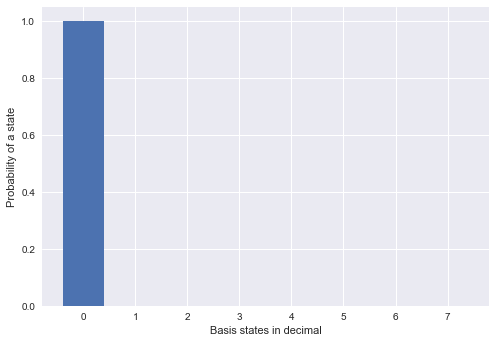

In [135]:
probs=circuit2(params,state_vector[0])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()
#  best optimization using current optimized parameters

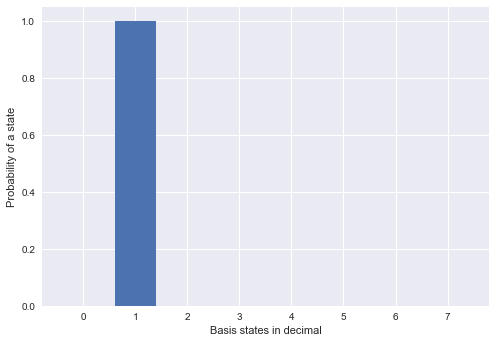

In [136]:
probs=circuit2(params,state_vector[1])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

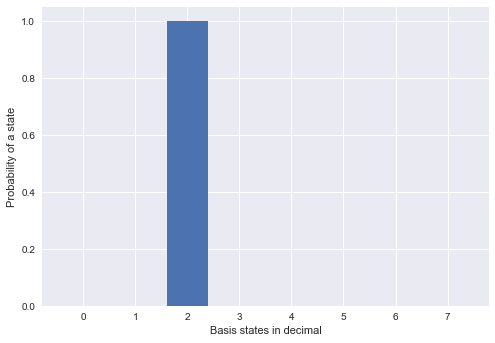

In [137]:
probs=circuit2(params,state_vector[2])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

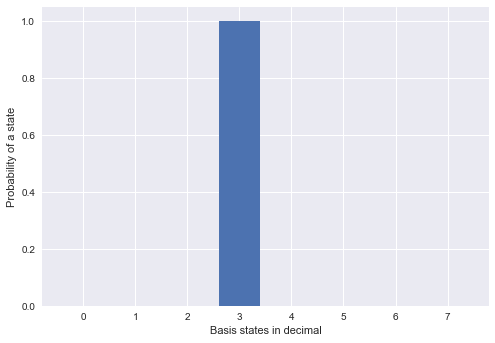

In [138]:
probs=circuit2(params,state_vector[3])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

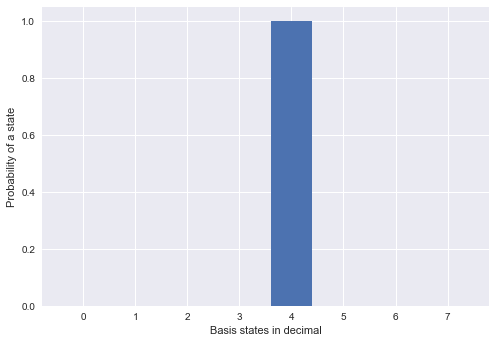

In [139]:
probs=circuit2(params,state_vector[4])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

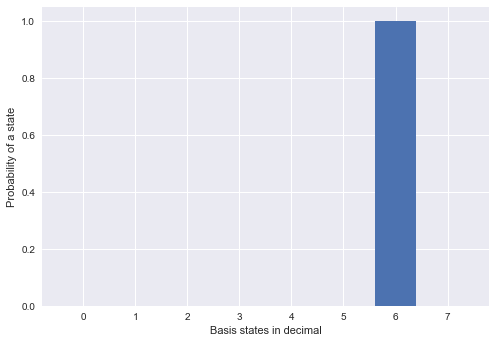

In [140]:
probs=circuit2(params,state_vector[5])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

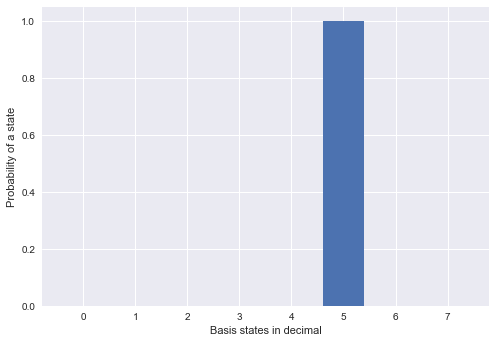

In [141]:
probs=circuit2(params,state_vector[6])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

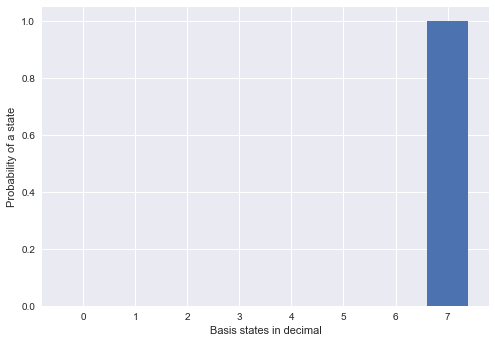

In [142]:
probs=circuit2(params,state_vector[7])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.show()

In [91]:
params # optimized params

tensor([ 5.78678604e-001,  3.92696871e-001,  5.78678604e-001,
         1.17809725e+000,  5.94502723e-001,  5.94502723e-001,
         3.92694124e-001,  3.92705752e-001, -1.26610241e-132,
        -1.93236093e-143], requires_grad=True)

In [139]:
circuit2.draw() # the corresponding circuit

' 0: ──╭|1⟩──╭C───────────────╭C───────────────────────╭C───────────────╭C──RZ(1.31)──H──╭C────────────╭C──H──H──╭C────────────╭C──H──────────────────────────────────────────────────────────────────────────────────╭C───────────────╭C───────────────────────╭C───────────────╭C──RZ(1.31)──H──╭C────────────╭C──H──H──╭C────────────╭C──H──────────────────────────────────────────────────────────────────────────────────╭C───────────────╭C───────────────────────╭C───────────────╭C──RZ(1.31)──H──╭C────────────╭C──H──H──╭C────────────╭C──H──────────────────────────────────────────────────────────────────────────────────╭C───────────────╭C───────────────────────╭C───────────────╭C──RZ(1.31)──H──╭C────────────╭C──H──H──╭C────────────╭C──H──────────────────────────────────────────────────────────────────────────────────╭C───────────────╭C───────────────────────╭C───────────────╭C──RZ(1.31)──H──╭C────────────╭C──H──H──╭C────────────╭C──H────────────────────────────────────────────────────────────────